In [1]:
import pandas as pd
from matplotlib.pyplot import plot, bar
from textblob import TextBlob

# config

In [2]:
cases_data = 'corona_lb_data.csv'
tweets_data = '..\\..\\Project_Final_Scripts\\tweets_data.csv'
save_to = 'tweets_sentiment.csv'
pd.set_option('display.max_rows', 255)

# read corona lb data

In [3]:
corona = pd.read_csv(cases_data, header=0)
corona.head()

,date,year,month,day,total_cases,new_cases,total_deaths,new_deaths
0,2020-02-01,2020,2,1,0.0,0.0,0.0,0.0
1,2020-02-02,2020,2,2,0.0,0.0,0.0,0.0
2,2020-02-03,2020,2,3,0.0,0.0,0.0,0.0
3,2020-02-04,2020,2,4,0.0,0.0,0.0,0.0
4,2020-02-05,2020,2,5,0.0,0.0,0.0,0.0


# months data

In [4]:
month_groups = corona.groupby('month')

months_data = {}

for month, month_data in month_groups:
    average_cases = int(month_data.new_cases.mean())
    average_death = int(month_data.new_deaths.mean())
    
    month_cases = int(month_data.new_cases.sum())
    month_deaths = int(month_data.new_deaths.sum())
    
    comulative_cases = int(month_data.total_cases.max())
    comulative_deaths = int(month_data.total_deaths.max())
    
    months_data[month] = {
        'average_cases':average_cases,
        'average_deaths':average_death,
        'month_cases': month_cases,
        'month_deaths': month_deaths,
        'comulative_cases': comulative_cases,
        'comulative_deaths': comulative_deaths,
    }

In [5]:
months_data

{2: {'average_cases': 0,
  'average_deaths': 0,
  'month_cases': 3,
  'month_deaths': 0,
  'comulative_cases': 3,
  'comulative_deaths': 0},
 3: {'average_cases': 16,
  'average_deaths': 0,
  'month_cases': 443,
  'month_deaths': 11,
  'comulative_cases': 446,
  'comulative_deaths': 11},
 4: {'average_cases': 9,
  'average_deaths': 0,
  'month_cases': 275,
  'month_deaths': 13,
  'comulative_cases': 721,
  'comulative_deaths': 24},
 5: {'average_cases': 15,
  'average_deaths': 0,
  'month_cases': 470,
  'month_deaths': 2,
  'comulative_cases': 1191,
  'comulative_deaths': 26},
 6: {'average_cases': 18,
  'average_deaths': 0,
  'month_cases': 554,
  'month_deaths': 8,
  'comulative_cases': 1745,
  'comulative_deaths': 34},
 7: {'average_cases': 83,
  'average_deaths': 0,
  'month_cases': 2589,
  'month_deaths': 23,
  'comulative_cases': 4334,
  'comulative_deaths': 57},
 8: {'average_cases': 404,
  'average_deaths': 3,
  'month_cases': 12536,
  'month_deaths': 103,
  'comulative_cases':

# add previous cases & deaths

In [6]:
prev_cases, prev_deaths = 0, 0
def get_data(row):
    global prev_cases, prev_deaths
    
    res = pd.Series([prev_cases, prev_deaths])
    
    if row.new_cases > 0:
        prev_cases = row.new_cases
    
    if row.new_deaths > 0:
        prev_deaths = row.new_deaths
    
    return res

corona[['prev_cases', 'prev_deaths']] = corona.apply(get_data, axis=1)
corona = corona.fillna(0)

In [7]:
corona

,date,year,month,day,total_cases,new_cases,total_deaths,new_deaths,prev_cases,prev_deaths
0,2020-02-01,2020,2,1,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-02,2020,2,2,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-03,2020,2,3,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-04,2020,2,4,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-05,2020,2,5,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-02-06,2020,2,6,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-02-07,2020,2,7,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-02-08,2020,2,8,0.0,0.0,0.0,0.0,0.0,0.0
8,2020-02-09,2020,2,9,0.0,0.0,0.0,0.0,0.0,0.0
9,2020-02-10,2020,2,10,0.0,0.0,0.0,0.0,0.0,0.0


# sentiment ratio

In [8]:
def calculate(row):
    avg_cases = months_data[row.month]['average_cases']
    avg_deaths = months_data[row.month]['average_deaths']
    
    cases_ratio = (row.prev_cases - row.new_cases) / avg_cases if avg_cases else 0
    deaths_ratio = (row.prev_deaths - row.new_deaths) / avg_deaths if avg_deaths else 0
    sentiment_ratio = (cases_ratio + deaths_ratio) / 2
    
    return pd.Series([cases_ratio, deaths_ratio, sentiment_ratio])

corona[['cases_ratio', 'deaths_ratio', 'sentiment_ratio']] = corona.apply(calculate, axis=1)

In [9]:
corona

,date,year,month,day,total_cases,new_cases,total_deaths,new_deaths,prev_cases,prev_deaths,cases_ratio,deaths_ratio,sentiment_ratio
0,2020-02-01,2020,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2020-02-02,2020,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2020-02-03,2020,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2020-02-04,2020,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2020-02-05,2020,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,2020-02-06,2020,2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,2020-02-07,2020,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,2020-02-08,2020,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,2020-02-09,2020,2,9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,2020-02-10,2020,2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [10]:
corona[['cases_ratio', 'deaths_ratio', 'sentiment_ratio']].describe()

,cases_ratio,deaths_ratio,sentiment_ratio
count,223.000000,223.000000,223.000000
mean,0.023987,0.028401,0.026194
std,0.810287,0.493492,0.480599
min,-3.733333,-2.333333,-1.866667
25%,-0.213521,0.000000,-0.168675
50%,0.000000,0.000000,0.000000
75%,0.200000,0.000000,0.177083
max,3.400000,3.666667,1.797442


# scale ratio into range [-1, 1] using MinMaxScaler()

In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

_2d_array = np.array(corona.sentiment_ratio).reshape(-1, 1)

In [12]:
scaler = MinMaxScaler((-1, 1))
data = scaler.fit_transform(_2d_array)

In [13]:
scaler.data_max_

array([1.79744224])

In [14]:
scaler.data_min_

array([-1.86666667])

In [15]:
sentiment_ratio = list(data.reshape(1, -1)[0])

In [16]:
corona['scaled_sentiment_ratio'] = pd.Series(sentiment_ratio)

In [17]:
corona.scaled_sentiment_ratio.describe()

count    223.000000
mean       0.033190
std        0.262328
min       -1.000000
25%       -0.073176
50%        0.018893
75%        0.115551
max        1.000000
Name: scaled_sentiment_ratio, dtype: float64

In [18]:
data = corona[['month', 'day', 'prev_cases', 'new_cases', 'total_cases', 'prev_deaths', 'new_deaths', 'total_deaths', 'scaled_sentiment_ratio']]
data

,month,day,prev_cases,new_cases,total_cases,prev_deaths,new_deaths,total_deaths,scaled_sentiment_ratio
0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.018893
1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.018893
2,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.018893
3,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.018893
4,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.018893
5,2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.018893
6,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.018893
7,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.018893
8,2,9,0.0,0.0,0.0,0.0,0.0,0.0,0.018893
9,2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.018893


# convert data to dict for easier access

In [19]:
sentiment_ratio_dict = {}
for row in data.iterrows():
    row = row[1]
    month = f'0{int(row.month)}'
    day = str(int(row.day)) if row.day > 10 else f'0{int(row.day)}'
    
    key = (month, day)
    sentiment_ratio_dict[key] = {
        'prev_cases': int(row.prev_cases),
        'new_cases': int(row.new_cases),
        'total_cases': int(row.total_cases),
        'prev_deaths': int(row.prev_deaths),
        'new_deaths': int(row.new_deaths),
        'total_deaths': int(row.total_deaths),
        'sentiment_ratio': row.scaled_sentiment_ratio
    }
    
sentiment_ratio_dict

{('02', '01'): {'prev_cases': 0,
  'new_cases': 0,
  'total_cases': 0,
  'prev_deaths': 0,
  'new_deaths': 0,
  'total_deaths': 0,
  'sentiment_ratio': 0.018892566822040546},
 ('02', '02'): {'prev_cases': 0,
  'new_cases': 0,
  'total_cases': 0,
  'prev_deaths': 0,
  'new_deaths': 0,
  'total_deaths': 0,
  'sentiment_ratio': 0.018892566822040546},
 ('02', '03'): {'prev_cases': 0,
  'new_cases': 0,
  'total_cases': 0,
  'prev_deaths': 0,
  'new_deaths': 0,
  'total_deaths': 0,
  'sentiment_ratio': 0.018892566822040546},
 ('02', '04'): {'prev_cases': 0,
  'new_cases': 0,
  'total_cases': 0,
  'prev_deaths': 0,
  'new_deaths': 0,
  'total_deaths': 0,
  'sentiment_ratio': 0.018892566822040546},
 ('02', '05'): {'prev_cases': 0,
  'new_cases': 0,
  'total_cases': 0,
  'prev_deaths': 0,
  'new_deaths': 0,
  'total_deaths': 0,
  'sentiment_ratio': 0.018892566822040546},
 ('02', '06'): {'prev_cases': 0,
  'new_cases': 0,
  'total_cases': 0,
  'prev_deaths': 0,
  'new_deaths': 0,
  'total_deaths

# clean memory

In [20]:
# corona = None
# month_groups = None
# months_data = None
# _2d_array = None
# scaler = None
# data = None
# sentiment_ratio = None

# load tweets

In [21]:
tweets = pd.read_csv(tweets_data, header=0)
tweets.head()

,username,date,text,tags,translated_text,location,latitude,longitude,KADAA_ID,KADAA_AR,KADAA_EN,MOHAFAZA_ID,MOHAFAZA_AR,MOHAFAZA_EN
0,Fouad Badaro,2020-09-05,#Corona #COVIDー19 Official Numbers in Lebanon ...,"['#Corona', '#كورونا_لبنان', '#كورونا', '#Stay...",#Corona #COVIDー19 Official Numbers in Lebanon ...,بيروت,33.8719,35.5097,31000,بيروت,Beirut,3,بيروت,Beirut
1,الكابتين,2020-09-05,#كورونا_لبنان \n#coronavirus,"['#كورونا_لبنان', '#coronavirus']",# Corona_Lebanon\n#coronavirus,بيروت,33.8719,35.5097,31000,بيروت,Beirut,3,بيروت,Beirut
2,سفير الشمال,2020-09-05,إدارة منتجع “البالما” توضح.. ماذا قالت عن إصاب...,"['#لبنان', '#كورونا']","The management of the ""Palma"" resort explains ...",ارة,33.5403,35.3800,81000,صيدا,Saida,8,الجنوب,South
3,Jihad,2020-09-05,عاجل: وزارة الصحة اللبنانية: 415 إصابة كورونا...,['#كورونا_لبنان'],Urgent: The Lebanese Ministry of Health: 415 C...,حالات,34.0828,35.6541,56000,جبيل,Jbeil,5,جبل لبنان,Mount Lebanon
4,Ali H. Merii,2020-09-05,أخيرا بكرا ٧ ايلول بتخلص التعبئة العامة وبترجع...,['#كورونا_لبنان'],"Finally, the 7 of September gets rid of the ge...",المشحاة,34.0500,35.7250,55000,كسروان,Kesserouane,5,جبل لبنان,Mount Lebanon


# split by date

In [22]:
tweets[['year', 'month', 'day']] = tweets.date.str.split('-', expand=True)

# get sentiment

In [23]:
def get_sentiments(row):
    text_sentiment = TextBlob(row.translated_text).sentiment.polarity
    
    key = (row.month, row.day)
    ratio_sentiment = sentiment_ratio_dict.get(key)
    if ratio_sentiment:
        ratio_sentiment = ratio_sentiment['sentiment_ratio']
    else:
        ratio_sentiment = 0
        
    mean_sentiment = (text_sentiment + ratio_sentiment) / 2
    if mean_sentiment <= -1 or mean_sentiment >= 1:
        mean_sentiment = float(int(mean_sentiment))

    return pd.Series([text_sentiment, ratio_sentiment, mean_sentiment])

In [24]:
tweets[['people_sentiment', 'situation_sentiment', 'mean_sentiment']] = tweets.apply(get_sentiments, axis=1)

# statistics

In [25]:
config = {
    'month': 'first',
    'day': 'first',
    'people_sentiment': 'mean',
    'situation_sentiment': 'mean',
    'mean_sentiment': 'mean'
}
days = tweets.groupby(['month', 'day']).agg(config).reset_index(drop=True)
days

,month,day,people_sentiment,situation_sentiment,mean_sentiment
0,02,01,0.100376,0.018893,0.059634
1,02,02,0.083802,0.018893,0.051347
2,02,03,0.084910,0.018893,0.051901
3,02,04,0.057694,0.018893,0.038293
4,02,05,0.074575,0.018893,0.046734
5,02,06,0.052919,0.018893,0.035906
6,02,07,0.042819,0.018893,0.030856
7,02,08,0.013471,0.018893,0.016182
8,02,09,0.096655,0.018893,0.057774
9,02,10,0.036529,0.000000,0.018264


In [26]:
X = range(len(days))
Y1 = days.people_sentiment
Y2 = days.situation_sentiment
Y3 = days.mean_sentiment

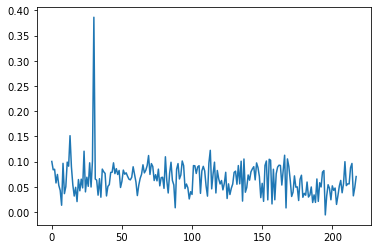

In [27]:
plot(X, Y1)

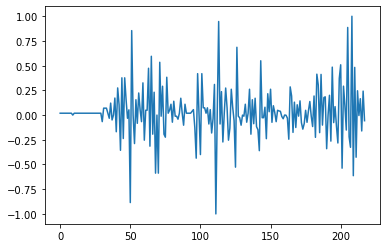

In [28]:
plot(X, Y2) 

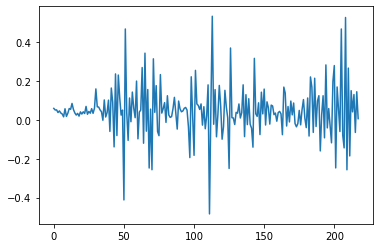

In [29]:
plot(X, Y3)

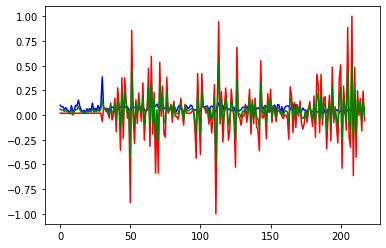

In [30]:
plot(X, Y1, 'b', X, Y2, 'r', X, Y3, 'g') 

In [31]:
config = {
    'month': 'first',
    'people_sentiment': 'mean',
    'situation_sentiment': 'mean',
    'mean_sentiment': 'mean'
}
months = tweets.groupby('month').agg(config).reset_index(drop=True)
months

,month,people_sentiment,situation_sentiment,mean_sentiment
0,02,0.062686,0.018538,0.040612
1,03,0.079293,0.031177,0.055235
2,04,0.071298,0.016121,0.043709
3,05,0.062952,0.028101,0.045526
4,06,0.063733,0.023590,0.043662
5,07,0.059132,0.004484,0.031808
6,08,0.040589,0.089759,0.065174
7,09,0.067839,0.024342,0.046090


In [32]:
X = months.month
Y1 = months.people_sentiment
Y2 = months.situation_sentiment
Y3 = months.mean_sentiment

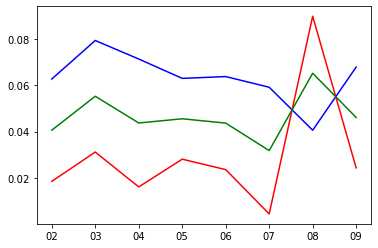

In [33]:
plot(X, Y1, 'b', X, Y2, 'r', X, Y3, 'g') 

# so what happened in months [7, 8, 9] for us to see a big up & down in the statistics

In [38]:
months_data[7]

{'average_cases': 83,
 'average_deaths': 0,
 'month_cases': 2589,
 'month_deaths': 23,
 'comulative_cases': 4334,
 'comulative_deaths': 57}

In [39]:
months_data[8]

{'average_cases': 404,
 'average_deaths': 3,
 'month_cases': 12536,
 'month_deaths': 103,
 'comulative_cases': 16870,
 'comulative_deaths': 160}

In [40]:
months_data[9]

{'average_cases': 500,
 'average_deaths': 5,
 'month_cases': 5007,
 'month_deaths': 52,
 'comulative_cases': 21877,
 'comulative_deaths': 212}

In [54]:
columns = [
    'month',
    'day',
    'prev_cases', 
    'new_cases', 
    'prev_deaths', 
    'new_deaths', 
    'cases_ratio', 
    'deaths_ratio', 
    'sentiment_ratio',
    'scaled_sentiment_ratio'
]

In [58]:
tmp_data = corona[corona.month.isin([7, 8, 9])]
tmp_data.sort_values(by='scaled_sentiment_ratio', ascending=False)

,date,year,month,day,total_cases,new_cases,total_deaths,new_deaths,prev_cases,prev_deaths,cases_ratio,deaths_ratio,sentiment_ratio,scaled_sentiment_ratio
208,2020-08-27,2020,8,27,14248.0,561.0,139.0,1.0,532.0,12.0,-0.071782,3.666667,1.797442,1.000000
205,2020-08-24,2020,8,24,12191.0,0.0,121.0,0.0,611.0,5.0,1.512376,1.666667,1.589521,0.886509
191,2020-08-10,2020,8,10,6517.0,294.0,76.0,0.0,272.0,6.0,-0.054455,2.000000,0.972772,0.549866
200,2020-08-19,2020,8,19,9337.0,0.0,105.0,0.0,456.0,2.0,1.128713,0.666667,0.897690,0.508883
194,2020-08-13,2020,8,13,7413.0,292.0,89.0,2.0,309.0,7.0,0.042079,1.666667,0.854373,0.485239
210,2020-08-29,2020,8,29,15613.0,676.0,148.0,2.0,689.0,7.0,0.032178,1.666667,0.849422,0.482537
183,2020-08-02,2020,8,2,4730.0,175.0,61.0,0.0,221.0,4.0,0.113861,1.333333,0.723597,0.413858
186,2020-08-05,2020,8,5,5062.0,0.0,65.0,0.0,177.0,3.0,0.438119,1.000000,0.719059,0.411381
199,2020-08-18,2020,8,18,9337.0,456.0,105.0,2.0,439.0,6.0,-0.042079,1.333333,0.645627,0.371299
184,2020-08-03,2020,8,3,4885.0,155.0,62.0,1.0,175.0,4.0,0.049505,1.000000,0.524752,0.305321


In [41]:
tmp_data.describe()

,year,month,day,total_cases,new_cases,total_deaths,new_deaths,prev_cases,prev_deaths,cases_ratio,deaths_ratio,sentiment_ratio,scaled_sentiment_ratio
count,72.0,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2020.0,7.708333,14.541667,7897.583333,279.611111,86.847222,2.472222,289.277778,3.069444,0.007163,0.087963,0.047563,0.044854
std,0.0,0.700855,9.186545,6238.493484,243.910660,53.636928,2.626904,241.323126,2.272471,0.459877,0.869574,0.511144,0.279000
min,2020.0,7.000000,1.000000,1778.000000,0.000000,34.000000,0.000000,5.000000,1.000000,-1.371287,-2.333333,-1.158416,-0.613412
25%,2020.0,7.000000,6.750000,2756.250000,75.000000,40.000000,0.000000,84.750000,1.000000,-0.198205,0.000000,-0.245225,-0.114960
50%,2020.0,8.000000,13.500000,5239.500000,179.500000,66.500000,2.000000,201.500000,2.000000,-0.024752,0.000000,0.009024,0.023818
75%,2020.0,8.000000,22.250000,12191.000000,459.250000,121.000000,4.000000,459.250000,4.000000,0.115896,0.333333,0.293729,0.179220
max,2020.0,9.000000,31.000000,21877.000000,1010.000000,212.000000,12.000000,1010.000000,12.000000,1.512376,3.666667,1.797442,1.000000


In [45]:
tmp_data[tmp_data.new_cases == tmp_data.new_cases.max()]

,date,year,month,day,total_cases,new_cases,total_deaths,new_deaths,prev_cases,prev_deaths,cases_ratio,deaths_ratio,sentiment_ratio,scaled_sentiment_ratio
201,2020-08-20,2020,8,20,10347.0,1010.0,109.0,4.0,456.0,2.0,-1.371287,-0.666667,-1.018977,-0.537301


In [46]:
tmp_data[tmp_data.new_deaths == tmp_data.new_deaths.max()]

,date,year,month,day,total_cases,new_cases,total_deaths,new_deaths,prev_cases,prev_deaths,cases_ratio,deaths_ratio,sentiment_ratio,scaled_sentiment_ratio
207,2020-08-26,2020,8,26,13687.0,532.0,138.0,12.0,964.0,5.0,1.069307,-2.333333,-0.632013,-0.326083


In [47]:
tmp_data[tmp_data.scaled_sentiment_ratio == tmp_data.scaled_sentiment_ratio.max()]

,date,year,month,day,total_cases,new_cases,total_deaths,new_deaths,prev_cases,prev_deaths,cases_ratio,deaths_ratio,sentiment_ratio,scaled_sentiment_ratio
208,2020-08-27,2020,8,27,14248.0,561.0,139.0,1.0,532.0,12.0,-0.071782,3.666667,1.797442,1.0
